# Intermediate Regression in R

Linear regression and logistic regression are the two most widely used statistical models and act like master keys, unlocking the secrets hidden in datasets. This course builds on the skills you gained in "Introduction to Regression in R", covering linear and logistic regression with multiple explanatory variables. Through hands-on exercises, you’ll explore the relationships between variables in real-world datasets, Taiwan house prices and customer churn modeling, and more. By the end of this course, you’ll know how to include multiple explanatory variables in a model, understand how interactions between variables affect predictions, and understand how linear and logistic regression work.

## Parallel Slopes

Extend your linear regression skills to "parallel slopes" regression, with one numeric and one categorical explanatory variable. This is the first step towards conquering multiple linear regression.

### Fitting a parallel slopes linear regression
In Introduction to Regression in R, you learned to fit linear regression models with a single explanatory variable. In many cases, using only one explanatory variable limits the accuracy of predictions. That means that to truly master linear regression, you need to be able to include multiple explanatory variables.

The case when there is one numeric explanatory variable and one categorical explanatory variable is sometimes called a "parallel slopes" linear regression due to the shape of the predictions – more on that in the next exercise.

Here, you'll revisit the Taiwan real estate dataset.

In [5]:
# libraries
library(fst)
library(ggplot2)
library(dplyr)
library(broom)
# read and see data 
taiwan_real_estate = read_fst("taiwan_real_estate2.fst")
str(taiwan_real_estate)
head(taiwan_real_estate)

# Fit a linear regr'n of price_twd_msq vs. n_convenience
mdl_price_vs_conv <- lm(price_twd_msq ~ n_convenience, data = taiwan_real_estate)

# See the result
mdl_price_vs_conv

'data.frame':	414 obs. of  4 variables:
 $ dist_to_mrt_m  : num  84.9 306.6 562 562 390.6 ...
 $ n_convenience  : num  10 9 5 5 5 3 7 6 1 3 ...
 $ house_age_years: Factor w/ 3 levels "0 to 15","15 to 30",..: 3 2 1 1 1 1 3 2 3 2 ...
 $ price_twd_msq  : num  11.5 12.8 14.3 16.6 13 ...


dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
84.87882,10,30 to 45,11.467474
306.59470,9,15 to 30,12.768533
561.98450,5,0 to 15,14.311649
561.98450,5,0 to 15,16.580938
390.56840,5,0 to 15,13.040847
2175.03000,3,0 to 15,9.712557



Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_real_estate)

Coefficients:
  (Intercept)  n_convenience  
       8.2242         0.7981  


In [6]:
# Fit a linear regr'n of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age <- lm(price_twd_msq ~ house_age_years + 0 , data = taiwan_real_estate)

# See the result
mdl_price_vs_age


Call:
lm(formula = price_twd_msq ~ house_age_years + 0, data = taiwan_real_estate)

Coefficients:
 house_age_years0 to 15  house_age_years15 to 30  house_age_years30 to 45  
                 12.637                    9.877                   11.393  


In [7]:
# Fit a linear regr'n of price_twd_msq vs. n_convenience 
# plus house_age_years, no intercept
mdl_price_vs_both <- lm(price_twd_msq ~ n_convenience + house_age_years + 0 , data = taiwan_real_estate)

# See the result
mdl_price_vs_both


Call:
lm(formula = price_twd_msq ~ n_convenience + house_age_years + 
    0, data = taiwan_real_estate)

Coefficients:
          n_convenience   house_age_years0 to 15  house_age_years15 to 30  
                 0.7915                   9.4133                   7.0852  
house_age_years30 to 45  
                 7.5110  


### Visualizing each explanatory variable
Being able to see the predictions made by a model makes it easier to understand. In the case where there is only one explanatory variable, ggplot lets you do this without any manual calculation or messing about.

To visualize the relationship between a numeric explanatory variable and the numeric response, you can draw a scatter plot with a linear trend line.

To visualize the relationship between a categorical explanatory variable and the numeric response, you can draw a box plot.

`geom_smooth()` using formula 'y ~ x'


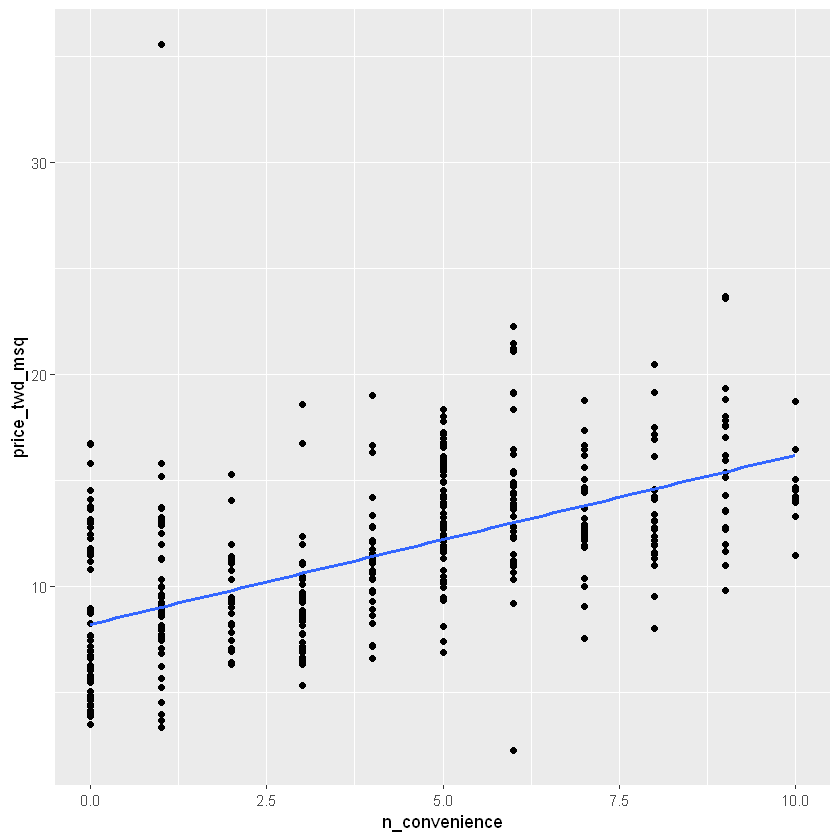

In [9]:
# Using taiwan_real_estate, plot price_twd_msq vs. n_convenience
ggplot(taiwan_real_estate, aes(x = n_convenience, y = price_twd_msq )) +
  # Add a point layer
  geom_point() +
  # Add a smooth trend line using linear regr'n, no ribbon
  geom_smooth(method = "lm", se = FALSE)

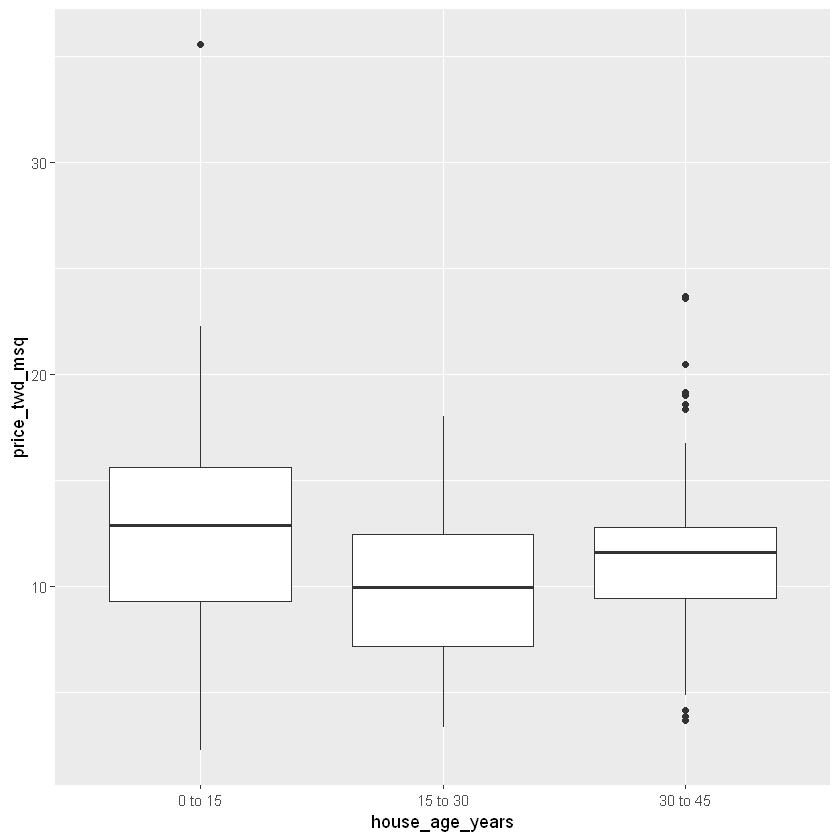

In [10]:
# Using taiwan_real_estate, plot price_twd_msq vs. house_age_years
ggplot(taiwan_real_estate, aes(x = house_age_years, y = price_twd_msq )) +
  # Add a box-plot layer
  geom_boxplot()

### Visualizing parallel slopes
The two plots in the previous exercise gave very different predictions: one gave a predicted response that increased linearly with a numeric variable; the other gave a fixed response for each category. The only sensible way to reconcile these two conflicting predictions is to incorporate both explanatory variables in the model at once.

When it comes to a linear regression model with a numeric and a categorical explanatory variable, ggplot2 doesn't have an easy, "out of the box" way to show the predictions. Fortunately, the moderndive package includes an extra geom, geom_parallel_slopes() to make it simple.

also installing the dependencies 'snakecase', 'operator.tools', 'janitor', 'formula.tools', 'infer'



package 'snakecase' successfully unpacked and MD5 sums checked
package 'operator.tools' successfully unpacked and MD5 sums checked
package 'janitor' successfully unpacked and MD5 sums checked
package 'formula.tools' successfully unpacked and MD5 sums checked
package 'infer' successfully unpacked and MD5 sums checked
package 'moderndive' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Migue\AppData\Local\Temp\Rtmp0qaMEH\downloaded_packages


Warning message:
"package 'moderndive' was built under R version 3.6.3"Warning message:
"`geom_parallel_slopes()` doesn't need a `method` argument ("lm" is used)."

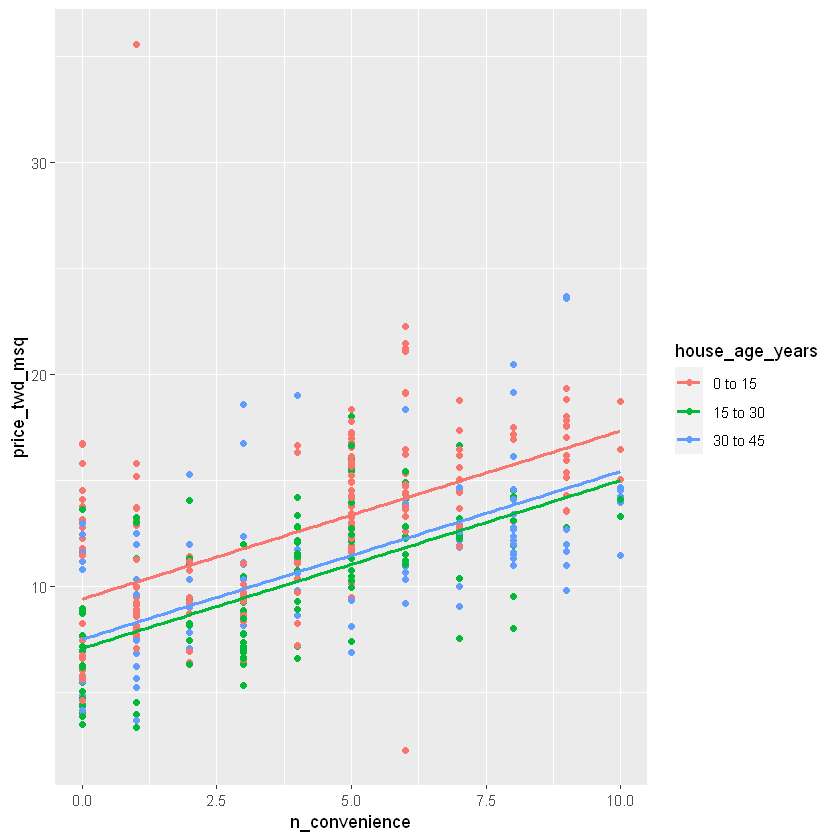

In [13]:
install.packages("moderndive")
library(moderndive)

# Using taiwan_real_estate, plot price_twd_msq vs. n_convenience
# colored by house_age_years
ggplot(taiwan_real_estate, aes(x = n_convenience, y = price_twd_msq, color = house_age_years)) +
  # Add a point layer
  geom_point() +
  # Add parallel slopes, no ribbon
  geom_parallel_slopes(method = "lm", se = FALSE)

### Predicting with a parallel slopes model
While ggplot can automatically show you model predictions, in order to get those values to program with, you'll need to do the calculations yourself.

Just as with the case of a single explanatory variable, the workflow has two steps: create a data frame of explanatory variables, then add a column of predictions. To make sure you've got the right answer, you can add your predictions to the ggplot with the geom_parallel_slopes() lines.

In [14]:
# Make a grid of explanatory data
explanatory_data <- expand.grid(
  # Set n_convenience to zero to ten
  n_convenience = seq(0,10,1),
  # Set house_age_years to the unique values of that variable
  house_age_years = unique(taiwan_real_estate$house_age_years)
)

# See the result
explanatory_data

# Add predictions to the data frame
prediction_data <- explanatory_data %>% 
  mutate(price_twd_msq = predict(mdl_price_vs_both, explanatory_data))

# See the result
prediction_data

n_convenience,house_age_years
0,30 to 45
1,30 to 45
2,30 to 45
3,30 to 45
4,30 to 45
5,30 to 45
6,30 to 45
7,30 to 45
8,30 to 45
9,30 to 45


n_convenience,house_age_years,price_twd_msq
0,30 to 45,7.510958
1,30 to 45,8.302415
2,30 to 45,9.093873
3,30 to 45,9.885330
4,30 to 45,10.676787
5,30 to 45,11.468244
6,30 to 45,12.259701
7,30 to 45,13.051158
8,30 to 45,13.842615
9,30 to 45,14.634072


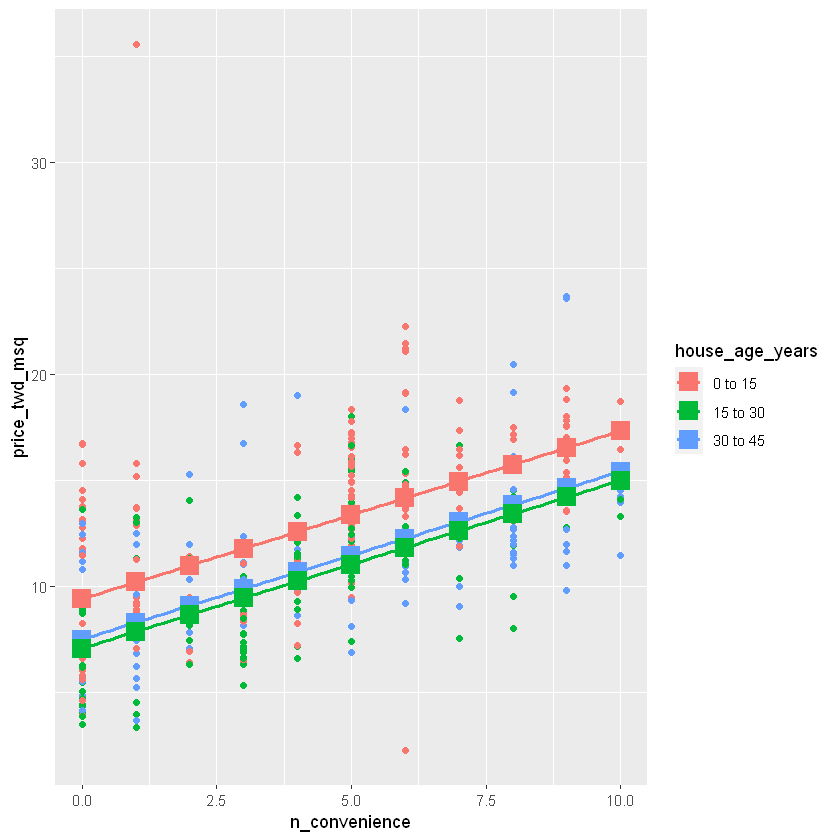

In [15]:
# plot

taiwan_real_estate %>% 
  ggplot(aes(n_convenience, price_twd_msq, color = house_age_years)) +
  geom_point() +
  geom_parallel_slopes(se = FALSE) +
  # Add points using prediction_data, with size 5 and shape 15
  geom_point(data = prediction_data, size = 5, shape = 15 )

### Manually calculating predictions
As with simple linear regression, you can manually calculate the predictions from the model coefficients. The only change for the parallel slopes case is that the intercept is different for each category of the categorical explanatory variable. That means you need to consider the case when each each category occurs separately.

In [17]:
# Get the coefficients from mdl_price_vs_both
coeffs <- coefficients(mdl_price_vs_both)

# Extract the slope coefficient
slope <- coeffs[1]

# Extract the intercept coefficient for 0 to 15
intercept_0_15 <- coeffs[2]

# Extract the intercept coefficient for 15 to 30
intercept_15_30 <- coeffs[3]

# Extract the intercept coefficient for 30 to 45
intercept_30_45 <- coeffs[4]

prediction_data <- explanatory_data %>% 
  mutate(
    # Consider the 3 cases to choose the intercept
    intercept = case_when(house_age_years == "0 to 15" ~ intercept_0_15,
     house_age_years == "15 to 30" ~ intercept_15_30, 
     house_age_years == "30 to 45" ~ intercept_30_45),
    
    # Manually calculate the predictions
    price_twd_msq = slope* n_convenience + intercept
  )

# See the results
prediction_data

n_convenience,house_age_years,intercept,price_twd_msq
0,30 to 45,7.510958,7.510958
1,30 to 45,7.510958,8.302415
2,30 to 45,7.510958,9.093873
3,30 to 45,7.510958,9.885330
4,30 to 45,7.510958,10.676787
5,30 to 45,7.510958,11.468244
6,30 to 45,7.510958,12.259701
7,30 to 45,7.510958,13.051158
8,30 to 45,7.510958,13.842615
9,30 to 45,7.510958,14.634072


### Comparing coefficients of determination
Recall that the coefficient of determination is a measure of how well the linear regression line fits the observed values. An important motivation for including several explanatory variables in a linear regression is that you can improve the fit compared to considering only a single explanatory variable.

Here you'll compare the coefficient of determination for the three Taiwan house price models, to see which gives the best result.

In [19]:
mdl_price_vs_conv %>% 
  # Get the model-level coefficients
  glance() %>% 
  # Select the coeffs of determination
  select(r.squared, adj.r.squared)

# Get the coeffs of determination for mdl_price_vs_age
mdl_price_vs_age %>% 
 # Get the model-level coefficients
  glance() %>% 
  # Select the coeffs of determination
  select(r.squared, adj.r.squared)

# Get the coeffs of determination for mdl_price_vs_both
mdl_price_vs_both %>% 
 # Get the model-level coefficients
  glance() %>% 
  # Select the coeffs of determination
  select(r.squared, adj.r.squared)

r.squared,adj.r.squared
0.3260466,0.3244108


r.squared,adj.r.squared
0.8960122,0.8952532


r.squared,adj.r.squared
0.9313508,0.930681


### Comparing residual standard error
The other common metric for assessing model fit is the residual standard error (RSE), which measures the typical size of the residuals.

In the last exercise you saw how including both explanatory variables into the model increased the coefficient of determination. How do you think using both explanatory variables will change the RSE?

In [20]:
mdl_price_vs_conv %>% 
  # Get the model-level coefficients
glance() %>% 
  # Pull out the RSE
  pull(sigma)

# Get the RSE for mdl_price_vs_age
mdl_price_vs_age %>% 
  # Get the model-level coefficients
glance() %>% 
  # Pull out the RSE
  pull(sigma)

# Get the RSE for mdl_price_vs_both
mdl_price_vs_both %>% 
# Get the model-level coefficients
glance() %>% 
  # Pull out the RSE
  pull(sigma)

# By including both explanatory variables in the model, a lower RSE was achieved, indicating a smaller difference between 
# the predicted responses and the actual responses.

[1] 3.383888

[1] 3.950184

[1] 3.21346